Batch gradient descent - uses all data points to compute gradients.

SGD updates weights using one data point at a time.

Mini-Batch Gradient Descent - This is a compromise between batch and stochastic gradient descent. It updates the weights using a small batch of data points in each iteration.

Conjugate Gradient Method - This is a more advanced optimization technique that avoids computing the Hessian matrix explicitly. It is suitable for quadratic cost functions.



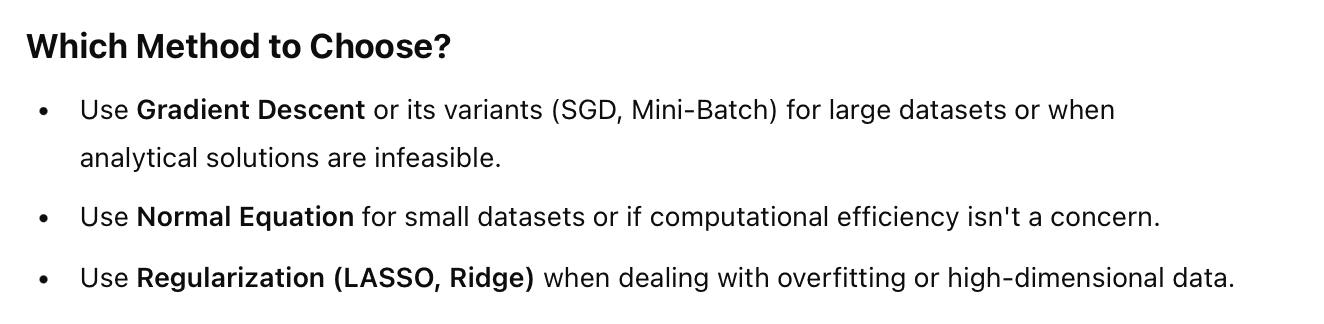

### **Bias**
is introduced in linear regression to increase the model's flexibility and allow it to fit data more accurately. Here's a detailed explanation of why bias is important:

---

### **1. Ensures Model Generality**
The linear regression equation is:
\[
\hat{y} = wX + b
\]
- **Weight (\(w\))**: Represents the slope of the line, determining how much \(y\) changes for a unit change in \(X\).
- **Bias (\(b\))**: Represents the intercept, determining the value of \(y\) when \(X = 0\).

Without bias (\(b = 0\)), the line is forced to pass through the origin. This constraint can lead to:
- A poor fit for datasets where the best-fit line does not pass through the origin.
- Limited flexibility in modeling data patterns.

---

### **2. Corrects for Systematic Errors**
Bias adjusts for situations where the dependent variable (\(y\)) is not zero when the independent variable (\(X\)) is zero. For example:
- In predicting housing prices, even if the square footage (\(X\)) is zero, the base price (\(y\)) of the land or a minimal structure will not be zero.
- Without bias, the model would inaccurately predict a zero price for zero square footage.

---

### **3. Improves the Fit of the Model**
By introducing bias, the model can:
- Shift the regression line up or down to minimize the cost function (e.g., Mean Squared Error).
- Fit a wider range of datasets more accurately.

For instance, if the dataset has a positive offset (e.g., all \(y\)-values are higher by 5), bias allows the model to adjust and capture this offset.

---

### **4. Provides Realistic Predictions**
- A regression model without bias might lead to unrealistic predictions when extrapolating.
- Bias ensures that the model aligns with real-world scenarios by incorporating the starting point of the relationship between \(X\) and \(y\).

---

### **Mathematical Intuition**
In gradient descent, the bias is updated alongside the weight:
\[
b \gets b - \alpha \cdot \frac{\partial J}{\partial b}
\]
- Including \(b\) ensures that the cost function \(J\) is minimized not just in terms of slope (\(w\)) but also in terms of the vertical shift needed to fit the data.

---

### **Example**
Consider two datasets:
1. Dataset A: \(X = [1, 2, 3], y = [2, 4, 6]\)
   - Here, \(y\) is proportional to \(X\), and bias \(b = 0\) suffices.
2. Dataset B: \(X = [1, 2, 3], y = [3, 5, 7]\)
   - The relationship includes an offset (\(+2\)), which requires bias \(b = 2\).

Without bias, Dataset B cannot be modeled accurately.

---

### **Key Takeaway**
Bias is crucial in linear regression because it:
- Increases the model's flexibility.
- Corrects for offsets or systematic errors.
- Ensures a better fit for a wide range of datasets.


In [8]:
import numpy as np

# Sample dataset
X = np.array([1, 2, 3])  # Independent variable
y = np.array([2.2, 2.8, 4.5])  # Dependent variable

# Initialize parameters
w = 0  # Initial weight (slope of the line, how steep the line is)
b = 0  # Initial bias (intercept, where the line crosses the y-axis)
alpha = 0.01  # Learning rate (controls how big the steps are during updates)
epochs = 5  # Number of iterations for gradient descent

# Number of data points
n = len(X)

# Gradient Descent
print("Starting Gradient Descent...\n")
for epoch in range(epochs):
    # Step 1: Compute predictions
    y_pred = w * X + b  # Predicted values based on the current weight and bias

    # Step 2: Calculate error
    error = y_pred - y  # Difference between predicted and actual values

    # Step 3: Compute gradients
    dw = (2/n) * np.sum(error * X)  # Partial derivative with respect to weight
    db = (2/n) * np.sum(error)      # Partial derivative with respect to bias

    # Step 4: Update weight and bias
    w -= alpha * dw  # Adjust weight using gradient and learning rate
    b -= alpha * db  # Adjust bias using gradient and learning rate

    # Print details for the current epoch
    print(f"Epoch {epoch + 1}/{epochs}:")
    print(f"  Gradient (dw): {dw:.4f}, Gradient (db): {db:.4f}")
    print(f"  Updated Weight (w): {w:.4f}, Updated Bias (b): {b:.4f}")
    print(f"  Error (Cost): {np.mean(error**2):.4f}\n")  # Mean Squared Error

# Final parameters
print("Gradient Descent Complete!")
print(f"Final Weight: {w:.4f}, Final Bias: {b:.4f}")

# Make predictions using the final model
X_test = np.array([6, 7])  # New data points
y_test_pred = w * X_test + b  # Predicted values using learned parameters
print(f"Predicted values for {X_test}: {y_test_pred}")


Starting Gradient Descent...

Epoch 1/5:
  Gradient (dw): -14.2000, Gradient (db): -6.3333
  Updated Weight (w): 0.1420, Updated Bias (b): 0.0633
  Error (Cost): 10.9767

Epoch 2/5:
  Gradient (dw): -12.6213, Gradient (db): -5.6387
  Updated Weight (w): 0.2682, Updated Bias (b): 0.1197
  Error (Cost): 8.6932

Epoch 3/5:
  Gradient (dw): -11.2178, Gradient (db): -5.0210
  Updated Weight (w): 0.3804, Updated Bias (b): 0.1699
  Error (Cost): 6.8883

Epoch 4/5:
  Gradient (dw): -9.9700, Gradient (db): -4.4719
  Updated Weight (w): 0.4801, Updated Bias (b): 0.2146
  Error (Cost): 5.4616

Epoch 5/5:
  Gradient (dw): -8.8606, Gradient (db): -3.9837
  Updated Weight (w): 0.5687, Updated Bias (b): 0.2545
  Error (Cost): 4.3338

Gradient Descent Complete!
Final Weight: 0.5687, Final Bias: 0.2545
Predicted values for [6 7]: [3.66666473 4.23536115]


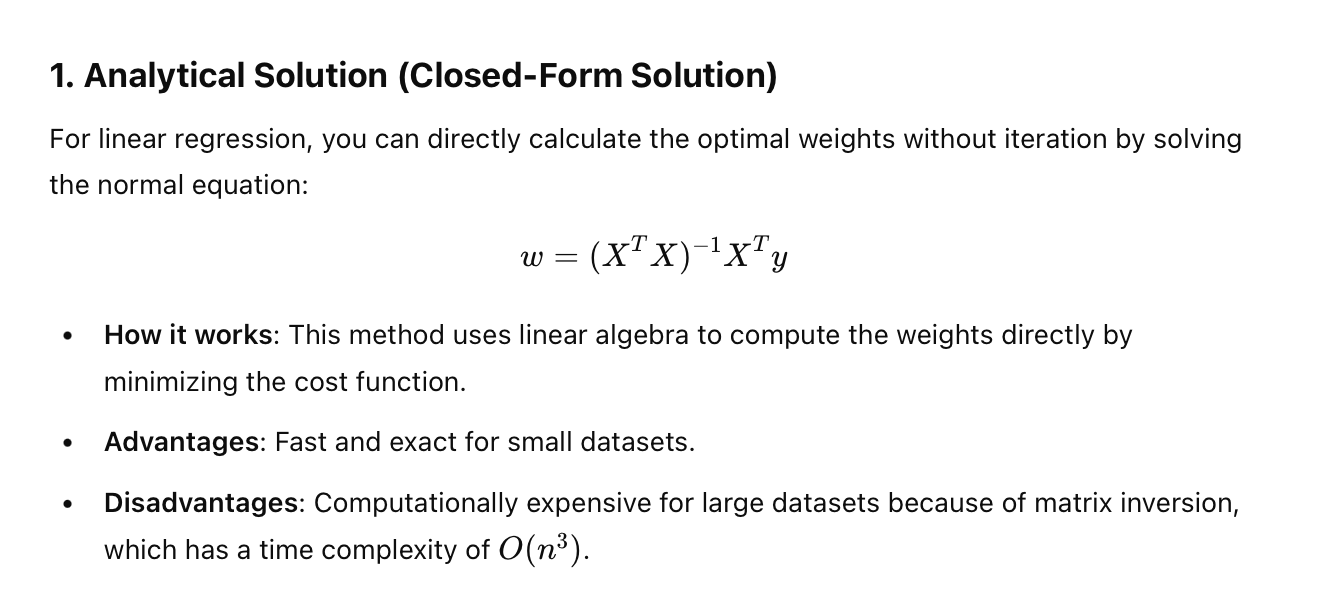

In [2]:
!pip install matplotlib

In [3]:
%matplotlib inline

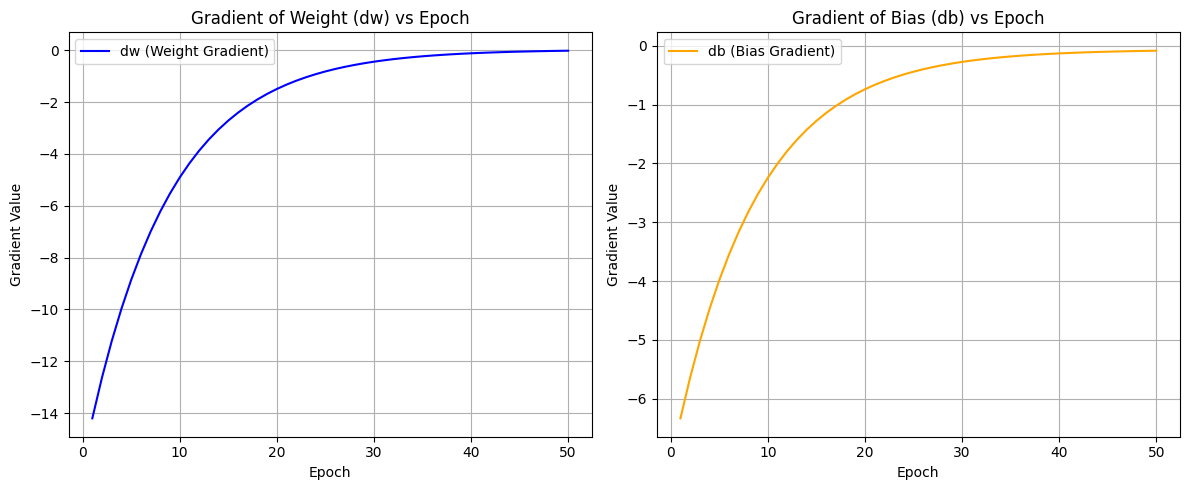

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Sample dataset
X = np.array([1, 2, 3])  # Independent variable
y = np.array([2.2, 2.8, 4.5])  # Dependent variable

# Initialize parameters
w = 0  # Initial weight
b = 0  # Initial bias
alpha = 0.01  # Learning rate
epochs = 50  # Number of iterations for gradient descent

# Number of data points
n = len(X)

# Lists to store gradient and parameter values for plotting
dw_values = []  # To store gradients of w
db_values = []  # To store gradients of b
cost_values = []  # To store cost at each epoch

# Gradient Descent
for epoch in range(epochs):
    # Compute predictions
    y_pred = w * X + b

    # Calculate error
    error = y_pred - y

    # Compute gradients
    dw = (2/n) * np.sum(error * X)  # Gradient of weight
    db = (2/n) * np.sum(error)      # Gradient of bias

    # Update weight and bias
    w -= alpha * dw
    b -= alpha * db

    # Save gradient and cost values for visualization
    dw_values.append(dw)
    db_values.append(db)
    cost_values.append(np.mean(error**2))  # Mean Squared Error

# Plotting the gradients
plt.figure(figsize=(12, 5))

# Plot dw
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), dw_values, label='dw (Weight Gradient)', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Gradient Value')
plt.title('Gradient of Weight (dw) vs Epoch')
plt.legend()
plt.grid(True)

# Plot db
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), db_values, label='db (Bias Gradient)', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Gradient Value')
plt.title('Gradient of Bias (db) vs Epoch')
plt.legend()
plt.grid(True)

# Display the plots
plt.tight_layout()
plt.show()


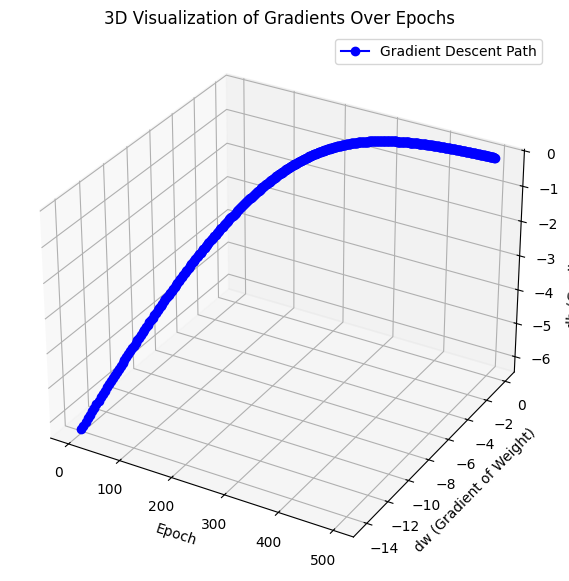

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Sample dataset
X = np.array([1, 2, 3])  # Independent variable
y = np.array([2.2, 2.8, 4.5])  # Dependent variable

# Initialize parameters
w = 0  # Initial weight
b = 0  # Initial bias
alpha = 0.001  # Learning rate
epochs = 500  # Number of iterations for gradient descent

# Number of data points
n = len(X)

# Lists to store gradient and parameter values for plotting
dw_values = []  # To store gradients of w
db_values = []  # To store gradients of b

# Gradient Descent
for epoch in range(epochs):
    # Compute predictions
    y_pred = w * X + b

    # Calculate error
    error = y_pred - y

    # Compute gradients
    dw = (2/n) * np.sum(error * X)  # Gradient of weight
    db = (2/n) * np.sum(error)      # Gradient of bias

    # Update weight and bias
    w -= alpha * dw
    b -= alpha * db

    # Save gradient values for visualization
    dw_values.append(dw)
    db_values.append(db)

# Plotting the 3D graph
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Data for the plot
epochs_range = range(1, epochs + 1)

# Create the 3D scatter and line plot
ax.plot(epochs_range, dw_values, db_values, label='Gradient Descent Path', color='blue', marker='o')

# Labels and Title
ax.set_xlabel('Epoch')
ax.set_ylabel('dw (Gradient of Weight)')
ax.set_zlabel('db (Gradient of Bias)')
ax.set_title('3D Visualization of Gradients Over Epochs')

# Show the legend and plot
ax.legend()
plt.show()
